In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


games_df = pd.read_csv('NBA/games.csv')
game_deets_df = pd.read_csv('NBA/games_details.csv', low_memory=False)
players_df = pd.read_csv('NBA/players.csv')
ranking_df = pd.read_csv('NBA/ranking.csv')
teams_df = pd.read_csv('NBA/teams.csv')
games_df['GAME_DATE_EST']= pd.to_datetime(games_df['GAME_DATE_EST'])
pd.set_option('display.max_columns',21)



HOME_TEAM_WINS
1    58.703238
0    41.296762
Name: count, dtype: float64
103.45589786080144 100.63987646881591


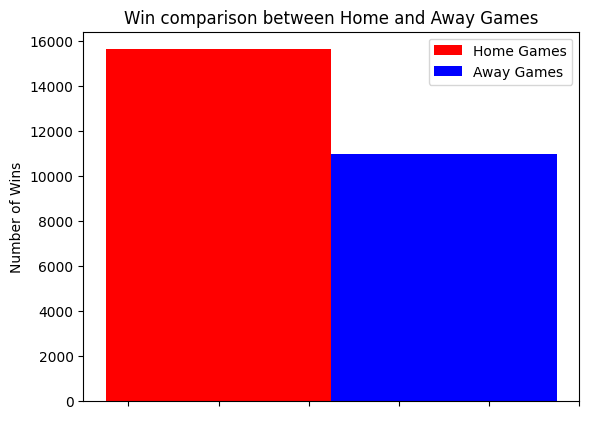

In [48]:
#data visualization 
home_wins = games_df['HOME_TEAM_WINS'].value_counts()/len(games_df) * 100
print(home_wins)

wl_group = games_df.groupby(['HOME_TEAM_WINS'])

win_filt = wl_group.get_group(1)
lose_filt = wl_group.get_group(0)

x = win_filt['HOME_TEAM_WINS'].value_counts()
y = lose_filt['HOME_TEAM_WINS'].value_counts()

ti = [0.5]
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = 'red',label = 'Home Games')
plt.bar(hor + 0.75,y,width = 0.25,color = 'blue',label = 'Away Games')

plt.ylabel('Number of Wins')
plt.xticks(color = 'w')
plt.title('Win comparison between Home and Away Games')
plt.legend()

#the graph shows that home teams have a higher chance of winning than away teams which can be due to the some of the following: 
#1. Home teams have more fans and support
#2. Home teams are more familiar with the court and the environment
#3. Home teams have less travel time and are more rested

#let us examine this further by looking at the average points scored by home and away teams 

def get_mean(df, col): 
    return df[col].mean()
def get_mean_2(df, first, seoncd): 
    return (df[first]/df[seoncd]).mean()
def get_mode(df, col):
    return df[col].mode()

home_points = get_mean(games_df,'PTS_home')
away_points = get_mean(games_df,'PTS_away')
print(home_points, away_points)


In [51]:
games_df.dropna()

# Merge the games_df and game_deets_df
games_df = games_df.rename(columns={'GAME_ID': 'GAME_ID2'})
game_deets_df = game_deets_df.rename(columns={'GAME_ID': 'GAME_ID2'})
# Rename the necessary columns in game_deets_df

# Group game_deets_df by GAME_ID2 and calculate the sum of defensive stats
defensive_stats = game_deets_df.groupby('GAME_ID2').agg({
    'FGA2': 'sum',
    'FGM2': 'sum',
    'FTA2': 'sum',
    'FTM2': 'sum',
    'TO2': 'sum',
    'BLK2': 'sum',
    'STL2': 'sum'
}).reset_index()

# Merge the defensive_stats with games_df
games_df = pd.merge(games_df, defensive_stats, on='GAME_ID2', how='left')

# Calculate the defensive stops for home and away games
games_df['Defensive_Stops_Home'] = (games_df['Opponent_FGA'] - games_df['Opponent_FGM']) + (games_df['Opponent_FTA'] - games_df['Opponent_FTM']) + games_df['Opponent_TO'] + games_df['Opponent_BLK'] + games_df['Opponent_STL']
games_df['Defensive_Stops_Away'] = (games_df['Opponent_FGA'] - games_df['Opponent_FGM']) + (games_df['Opponent_FTA'] - games_df['Opponent_FTM']) + games_df['Opponent_TO'] + games_df['Opponent_BLK'] + games_df['Opponent_STL']

# Print the results
print(games_df[['GAME_ID2', 'Defensive_Stops_Home', 'Defensive_Stops_Away']])

#let us calculate the defensive stops for each team on home games and away games for each team 





       GAME_ID2  Defensive_Stops_Home  Defensive_Stops_Away
0      22200477                   NaN                   NaN
1      22200478                   NaN                   NaN
2      22200466                   NaN                   NaN
3      22200467                   NaN                   NaN
4      22200468                   NaN                   NaN
...         ...                   ...                   ...
26646  11400007                   NaN                   NaN
26647  11400004                   NaN                   NaN
26648  11400005                   NaN                   NaN
26649  11400002                   NaN                   NaN
26650  11400001                   NaN                   NaN

[26651 rows x 3 columns]


545